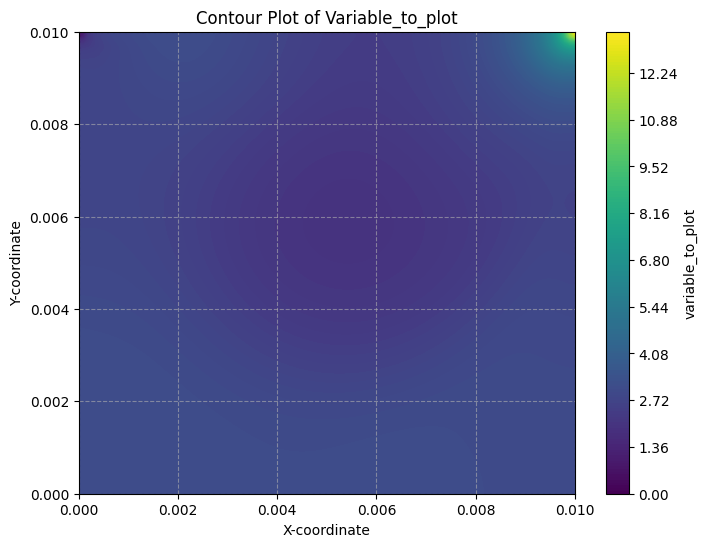

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# --- 1. 데이터 불러오기 ---
# 만약 'data.csv' 파일이 있다면 아래 코드의 주석을 해제하세요.
df = pd.read_csv(r"C:\Users\spearlab05\Desktop\Galerkin ROM\Data\case10.csv") 

#CASE FILE NUMBER INFO:
#[1 : 0.01004808655580044, 2 : 0.015072129833700659, 3 : 0.02009617311160088, 4 : 0.025120216389501095, 5 : 0.030144259667401318, 6 : 0.03516830294530154, 
# 7 : 0.04019234622320176, 8 : 0.045216389501101975, 9 : 0.05024043277900219, 10 : 0.05526447605690241, 11 : 0.060288519334802636, 12 : 0.06531256261270287, 
# 13: 0.07033660589060307, 
# 14 : 0.0753606491685033, 15: 0.08038469244640352, 16 : 0.08540873572430374, 17 : 0.09043277900220395, 18 : 0.09545682228010417, 19 : 0.10048086555800438]




# --- 2. 플롯할 데이터 준비 ---
# x, y 좌표 및 플롯할 변수(pressure)를 추출합니다.

x = df['    x-coordinate'].values
y = df['    y-coordinate'].values +0.01
# 'pressure', 'x-velocity', 'y-velocity' 중 원하는 변수를 선택하세요.
#variable_to_plot = '      x-velocity' 
#variable_to_plot = '      y-velocity' 


p=df['        pressure'].values 
u=df['      x-velocity'].values
v=df['      y-velocity'].values

z= p

# --- 3. 데이터를 격자 형태로 보간(Interpolation) ---
# 원본 데이터의 범위를 기반으로 새로운 격자(grid)를 생성합니다.
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]

# griddata를 사용하여 원본 데이터를 새로운 격자에 보간합니다.
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# --- 4. 컨투어 플롯 생성 ---
plt.figure(figsize=(8, 6))

# contourf 함수로 색상이 채워진 컨투어 플롯을 그립니다.
# levels는 등고선의 개수를 의미하며, cmap은 컬러맵을 지정합니다.
contour = plt.contourf(grid_x, grid_y, grid_z, levels=200, cmap='viridis')


# --- 5. 플롯 마무리 ---
# 컬러바 추가
cbar = plt.colorbar(contour)
cbar.set_label("variable_to_plot")

# 제목 및 축 레이블 설정
plt.title(f'Contour Plot of {"variable_to_plot".capitalize()}')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

plt.grid(True, linestyle='--', alpha=0.6)
#plt.gca().set_aspect('equal', adjustable='box') # x, y 축 비율을 동일하게 설정

# 플롯 보여주기
plt.show()


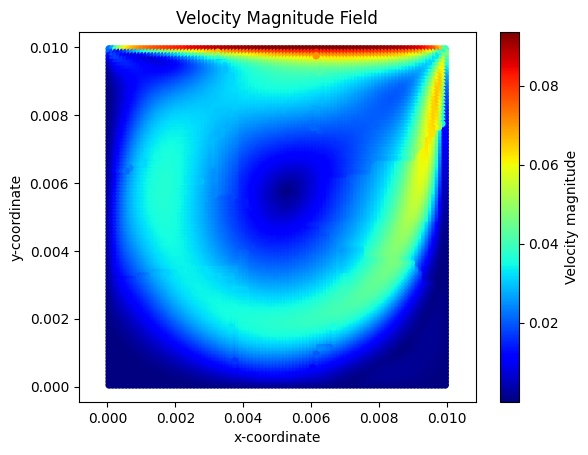

In [15]:
import numpy as np
speed = np.sqrt(u**2 + v**2)

plt.scatter(x, y, c=speed, cmap="jet", s=20)
plt.colorbar(label="Velocity magnitude")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.title("Velocity Magnitude Field")
plt.axis("equal")
plt.show()